In [2]:
import pandas as pd

FILE_PATH='acm.csv'


## Parse TXT file to CSV file

In [122]:
import csv


def yield_file_lines(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            yield line.strip()

def process_entry(lines):
    entry = {}
    for line in lines:
        if line.startswith('#*'):
            entry['Title'] = line[2:].strip()
        elif line.startswith('#@'):
            entry['Authors'] = line[2:].strip()
        elif line.startswith('#t'):
            entry['Year'] = line[2:].strip()
        elif line.startswith('#c'):
            entry['Venue'] = line[2:].strip()
        elif line.startswith('#index'):
            entry['Index'] = line[6:].strip()
        elif line.startswith('#%'):
            references = entry.get('References', [])
            references.append(line[2:].strip())
            entry['References'] = references
    return entry


def process_large_file(input_path, output_path):
    current_lines = []

    with open(output_path, 'w', newline='') as csvfile:
        fieldnames = ['Title', 'Authors', 'Year', 'Venue', 'Index', 'References']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for line in yield_file_lines(input_path):
            if line.startswith('#*') and current_lines:
                entry = process_entry(current_lines)
                if 'References' in entry:
                    entry['References'] = ', '.join(entry['References'])
                writer.writerow(entry)
                current_lines = []

            current_lines.append(line)

        if current_lines:
            entry = process_entry(current_lines)
            if 'References' in entry:
                entry['References'] = ', '.join(entry['References'])
            writer.writerow(entry)

process_large_file('acm.txt', 'acm.csv')

In [35]:
# 1658465 - TA
authors = set()
venues = set()
index = set()
references = set()

def authors_split(authors):
    result = []
    extend = False
    
    for author in authors.split(','):
        author = author.strip()

        if 'Jr.' in author:
            if not result:
                result.append('Jr.')
                extend = True
            else:
                result[-1] += ' Jr.'
        else:
            if extend:
                result[-1] += author
                extend = False
            else:
                result.append(author)
 
    return result

df = pd.read_csv(FILE_PATH, skiprows=0)

authors = [author for sublist in list(df['Authors'].dropna().map(authors_split)) for author in sublist]

print('number of unique authors: ', len(set(authors)))

venues = set(df['Venue'].dropna())

print('number of unique venues: ', len(venues))

index = set(df['Index'].dropna())

print('number of unique index: ', len(index))


references = set([reference for sublist in list(df['References'].dropna().map(lambda x: x.split(','))) for reference in sublist])

print('number of unique references: ', len(references))


number of unique authors:  1652801
number of unique venues:  273328
number of unique index:  2385013
number of unique references:  1181415


In [36]:

filtered_df = df[df['Title'].str.contains('Principles and Practice of Knowledge Discovery in Databases', na=False, case=False)]

venues = filtered_df['Venue'].dropna().unique()

for venue in venues:
    print(venue + '\n')



PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases

Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)

Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)

PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases

PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases



## Since one conference has multiple different venue names, which indiacates the numbers of unique publications are not accurate.


## The venues have slightly different names 

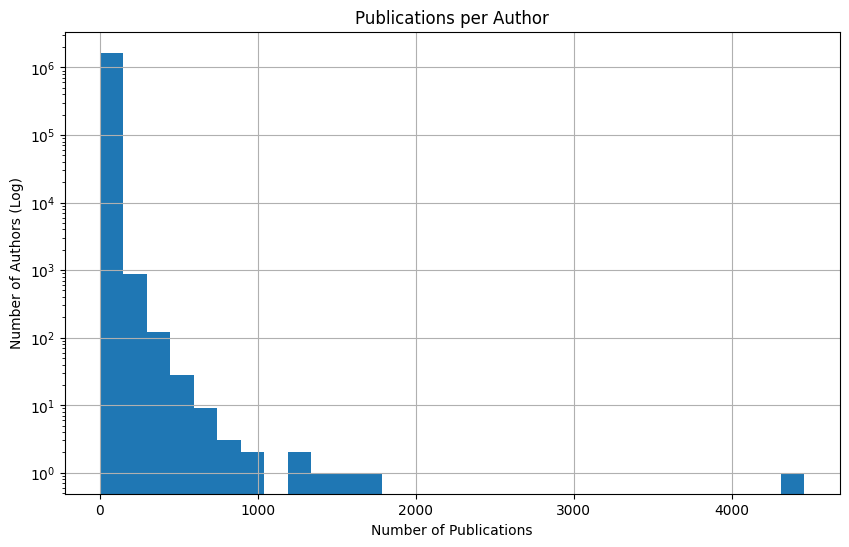

In [37]:
import matplotlib.pyplot as plt


def plot_histogram_number_of_publications_per_authors():
    df = pd.read_csv(FILE_PATH)
    
    authors_map = {}

    for i, row in df.iterrows():
        if pd.notna(row['Authors']) and pd.notna(row['Title']):
            authors = authors_split(row['Authors'])
            title = row['Title']
            for author in authors:
                author = author.strip()
                if author in authors_map:
                    authors_map[author].append(title)
                else:
                    authors_map[author] = [title]

    publication_counts = [len(publications) for publications in authors_map.values()]

    plt.figure(figsize=(10, 6))
    plt.hist(publication_counts, bins=30, log=True)
    plt.xlabel('Number of Publications')
    plt.ylabel('Number of Authors (Log)')
    plt.title('Publications per Author')
    plt.grid(True)
    plt.show()

    return publication_counts


publication_counts = plot_histogram_number_of_publications_per_authors()

# authors = '_ ,_ ,_'
# authors = '_ ,_'

In [ ]:
import numpy as np

print("Mean -",np.mean(publication_counts))
print("Standard Deviation -",np.std(publication_counts))
print("Q1 - ",np.percentile(publication_counts,25))
print("Median - ",np.percentile(publication_counts,50))
print("Q3 - ",np.percentile(publication_counts,75))

Mean - 3.454151137463698
Standard Deviation - 10.738156357011746
Q1 -  1.0
Median -  1.0
Q3-  3.0


Venue with most publications: IEEE Transactions on Information Theory


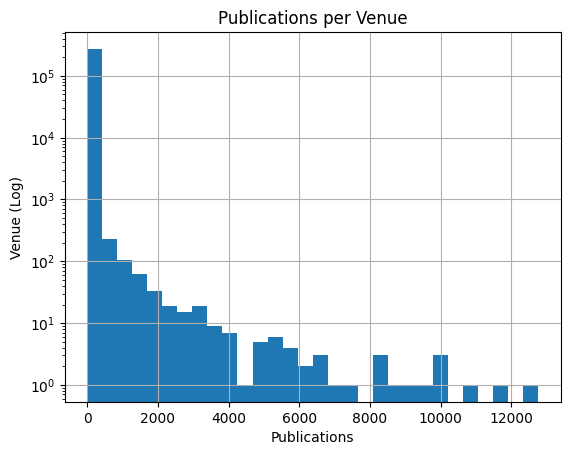

In [45]:

def plot_histogram_number_of_publications_per_venue():
    df = pd.read_csv(FILE_PATH)
    
    venue_map = {}

    for i, row in df.iterrows():
        if pd.notna(row['Venue']) and pd.notna(row['Title']):
            venue = row['Venue']
            title = row['Title']

            if venue in venue_map:
                venue_map[venue] += 1
            else:
                venue_map[venue] = 1

    print('Venue with most publications:', max(venue_map, key=venue_map.get))
    
    publication_counts = [counts for counts in venue_map.values()]

    plt.hist(publication_counts, bins=30, log=True)
    plt.xlabel('Publications')
    plt.ylabel('Venue (Log)')
    plt.title('Publications per Venue')
    plt.grid(True)
    plt.show()

    return publication_counts

publication_counts = plot_histogram_number_of_publications_per_venue()

In [43]:
import numpy as np
print("Mean -", np.mean(publication_counts))
print("Standard Deviation -", np.std(publication_counts))
print("Q1 - ", np.percentile(publication_counts,25))
print("Median - ", np.percentile(publication_counts,50))
print("Q3 - ", np.percentile(publication_counts,75))

Mean - 8.725348299479014
Standard Deviation - 106.78868370244105
Q1 -  1.0
Median -  1.0
Q3 -  1.0


IEEE Transactions on Information Theory is the venue with the most publications


In [156]:
title_map = {}
df = pd.read_csv(FILE_PATH)

for i, row in df.iterrows():
    index = row['Index']
    title = row['Title']
    title_map[index] = title

KeyboardInterrupt: 

809 2015217


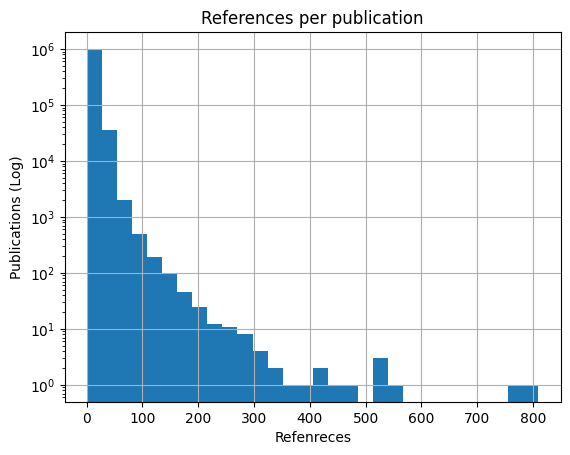

In [ ]:

def plot_histogram_number_of_references_per_publication():
    df = pd.read_csv(FILE_PATH)
    
    references_map = {}
    title_map = {}

    for i, row in df.iterrows():
        if pd.notna(row['References']) and pd.notna(row['Index']):
            references = row['References']
            index = row['Index']
            title = row['Title']
            
            number_of_references = len(references.split(','))
            
            if index in references_map:
                references_map[index] += number_of_references
            else:
                references_map[index] = number_of_references
                title_map[index] = title

    max_citation_index = max(references_map, key=references_map.get)
    max_citation_count = references_map[max_citation_index]
    max_citation_title = title_map[max_citation_index]

    print(max_citation_count, max_citation_index, max_citation_title)

    publication_counts = [counts for counts in references_map.values()]

    plt.hist(publication_counts, bins=30, log=True)
    plt.xlabel('Refenreces')
    plt.ylabel('Publications (Log)')
    plt.title('References per publication')
    plt.grid(True)
    plt.show()

    return publication_counts

publication_counts = plot_histogram_number_of_references_per_publication()

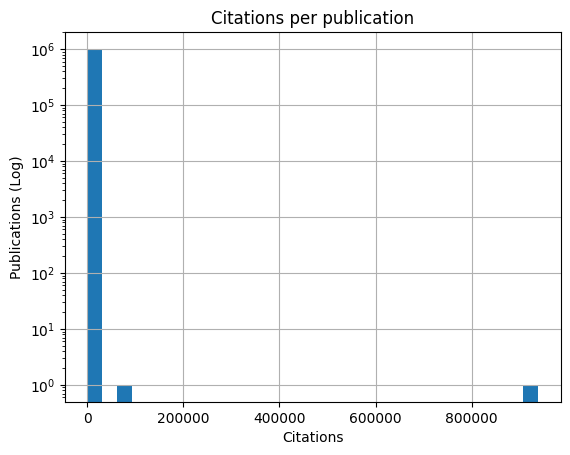

In [58]:

def plot_histogram_number_of_citations_per_publication():
    df = pd.read_csv(FILE_PATH)
    
    citations_map = {}

    for i, row in df.iterrows():
        if pd.notna(row['References']) and pd.notna(row['Index']):
            references = row['References'].strip().split(',')

            for reference in references:
                reference = reference.strip()
                if reference in citations_map:
                    citations_map[reference] += 1
                else:
                    citations_map[reference] = 1

    max_citation_index = max(citations_map, key=citations_map.get)
    max_citation_count = citations_map[max_citation_index]

    publication_counts = [counts for counts in citations_map.values()]

    plt.hist(publication_counts, bins=30, log=True)
    plt.xlabel('Citations')
    plt.ylabel('Publications (Log)')
    plt.title('Citations per publication')
    plt.grid(True)
    plt.show()

    return publication_counts

publication_counts = plot_histogram_number_of_citations_per_publication()

In [138]:
print("Mean -", np.mean(publication_counts))
print("Standard Deviation -", np.std(publication_counts))
print("Q1 - ", np.percentile(publication_counts,25))
print("Median - ", np.percentile(publication_counts,50))
print("Q3 - ", np.percentile(publication_counts,75))

Mean - 8.186702386544948
Standard Deviation - 780.488192515437
Q1 -  1.0
Median -  2.0
Q3 -  6.0


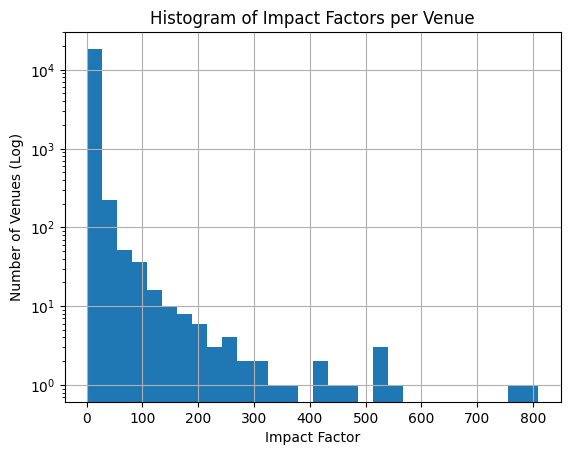

Venue with highest impact factor: ACM SIGOPS 24th Symposium on Operating Systems Principles, Impact Factor: 809.0


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_and_plot_impact_factor(file_path):
    df = pd.read_csv(file_path)
    
    venue_citations = {}
    venue_publications = {}

    for i, row in df.iterrows():
        if pd.notna(row['Venue']) and pd.notna(row['References']):
            venue = row['Venue']
            citations = row['References'].split(',')
            
            venue_citations[venue] = venue_citations.get(venue, 0) + len(citations)

            venue_publications[venue] = venue_publications.get(venue, 0) + 1

    impact_factors = {
        venue: citations / venue_publications[venue]
        for venue, citations in venue_citations.items()
    }

    impact_factor_values = list(impact_factors.values())

    plt.hist(impact_factor_values, bins=30, log=True)
    plt.xlabel('Impact Factor')
    plt.ylabel('Number of Venues (Log)')
    plt.title('Histogram of Impact Factors per Venue')
    plt.grid(True)
    plt.show()

    return impact_factors

impact_factors = calculate_and_plot_impact_factor(FILE_PATH)

max_impact_venue = max(impact_factors, key=impact_factors.get)
print(f"Venue with highest impact factor: {max_impact_venue}, Impact Factor: {impact_factors[max_impact_venue]}")


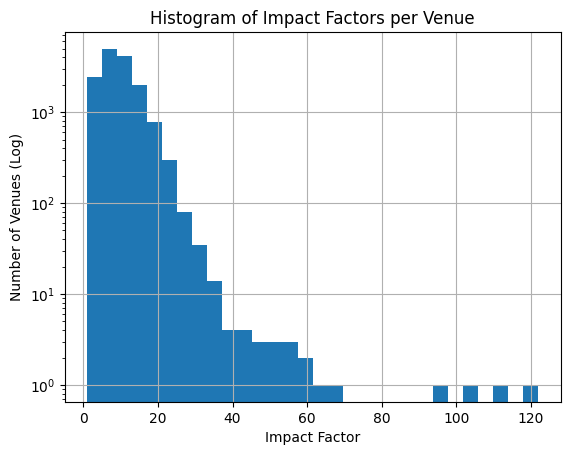

Venue with highest impact factor: Foundations and Trends in Information Retrieval, Impact Factor: 121.95652173913044


In [ ]:
def calculate_and_plot_impact_factor(file_path):
    df = pd.read_csv(file_path)
    
    venue_citations = {}
    venue_publications = {}

    for i, row in df.iterrows():
        if pd.notna(row['Venue']) and pd.notna(row['References']):
            venue = row['Venue']
            citations = row['References'].split(',')
            
            venue_citations[venue] = venue_citations.get(venue, 0) + len(citations)

            venue_publications[venue] = venue_publications.get(venue, 0) + 1

    impact_factors = {
        venue: citations / venue_publications[venue]
        for venue, citations in venue_citations.items() if venue_publications[venue] >= 10
    }

    impact_factor_values = list(impact_factors.values())

    plt.hist(impact_factor_values, bins=30, log=True)
    plt.xlabel('Impact Factor')
    plt.ylabel('Number of Venues (Log)')
    plt.title('Histogram of Impact Factors per Venue')
    plt.grid(True)
    plt.show()

    return impact_factors

impact_factors = calculate_and_plot_impact_factor(FILE_PATH)

max_impact_venue = max(impact_factors, key=impact_factors.get)
print(f"Venue with highest impact factor: {max_impact_venue}, Impact Factor: {impact_factors[max_impact_venue]}")


In [55]:
## Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

def plot_average_references_and_citations_per_publication_per_year():
    df = pd.read_csv(FILE_PATH)
    
    year_publication_map = {}


    for i, row in df.iterrows():
        if pd.notna(row['References']) and pd.notna(row['Index']) and pd.notna(row['Year']):
            citations = row['References'].strip().split(',')
            index = row['Index']
            year = row['Year']

            if year in year_publication_map:
                year_publication_map[year]['references'] += len(citations)
                year_publication_map[year]['publications'] += 1
            else:
                year_publication_map[year] = {
                    'references': len(citations),
                    'publications': 1
                }
            

plot_average_references_and_citations_per_publication_per_year()
    



KeyError: 'Citations'

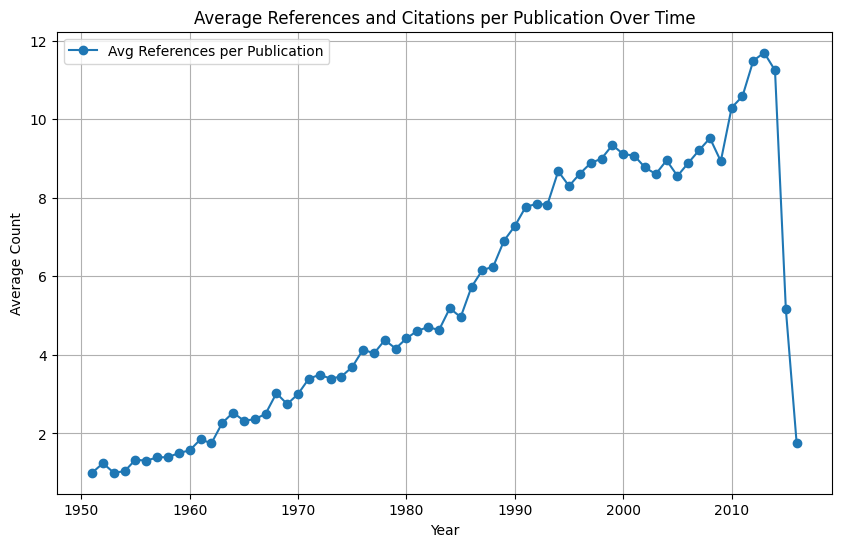

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

FILE_PATH = 'acm.csv'

def plot_average_references_and_citations_per_publication_per_year():
    df = pd.read_csv(FILE_PATH)

    year_publication_map = {}
    



    for i, row in df.iterrows():
        if pd.notna(row['References']) and pd.notna(row['Index']) and pd.notna(row['Year']):

            references = row['References'].strip().split(',')
            year = row['Year']
            index = row['Index']

            # Update the year publication map
            if year in year_publication_map:
                year_publication_map[year]['references'] += len(references)
                year_publication_map[year]['publications'] += 1
            else:
                year_publication_map[year] = {
                    'references': len(references),
                    'publications': 1,
                    'citations': 0
                }

    # Calculate averages
    years = []
    avg_references = []
    avg_citations = []  # Assuming 'citations' refers to incoming citations which we might not have data for

    for year, data in sorted(year_publication_map.items()):
        years.append(year)
        avg_references.append(data['references'] / data['publications'])

        # Placeholder for citations if available
        # avg_citations.append(data['citations'] / data['publications'])

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(years, avg_references, marker='o', label='Avg References per Publication')
    # Uncomment and adjust if citation data is available
    # plt.plot(years, avg_citations, marker='x', label='Avg Citations per Publication')

    plt.xlabel('Year')
    plt.ylabel('Average Count')
    plt.title('Average References and Citations per Publication Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_average_references_and_citations_per_publication_per_year()


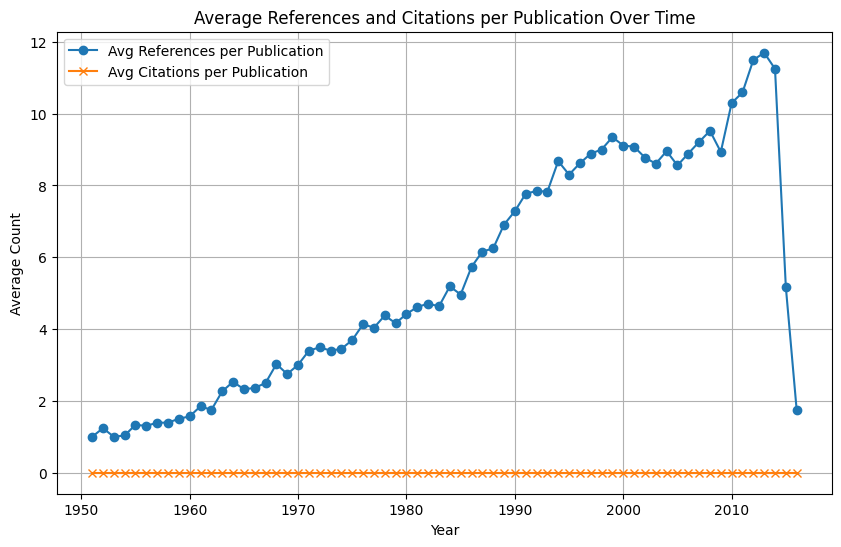